In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import warnings

# CSV 파일 불러오기

In [31]:
df = pd.read_csv("C:/Users/ghom9/Downloads/car_evaluation.csv", header = None) # 데이터값이 칼람으로 올라오면 header = None
df

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


# 칼람명 입력

In [32]:
df.columns=['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety',
       'output']

In [33]:
df

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


# 결측치 확인

In [34]:
print(df.isna().sum())

price           0
maint           0
doors           0
persons         0
lug_capacity    0
safety          0
output          0
dtype: int64


# 레이블 확인

In [35]:
df['output'].value_counts()

output
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

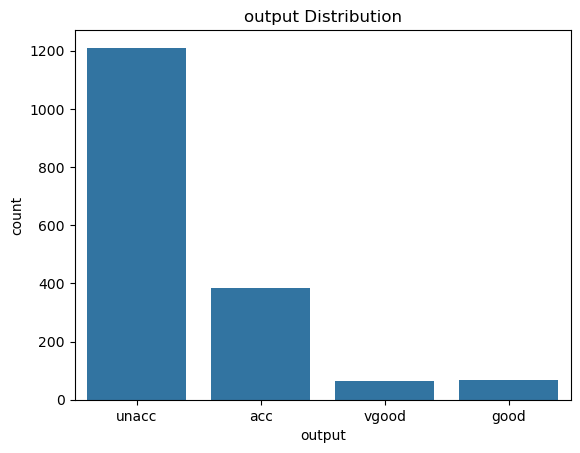

output
unacc    0.700231
acc      0.222222
good     0.039931
vgood    0.037616
Name: proportion, dtype: float64


In [36]:
sns.countplot(x='output', data=df) #output 컬럼의 데이터 개수를 시각화
plt.title("output Distribution") #그래프 제목 설정
plt.show()                         #그래프 출력
print(df['output'].value_counts(normalize=True))

# 라벨 엔코딩

In [37]:
columns = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety','output']

In [38]:
label_encoders = {}
for column in columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [39]:
df

,price,maint,doors,persons,lug_capacity,safety,output
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


# 특징, 타겟 데이터 입력

In [40]:
X = df.drop('output', axis=1)
y = df['output']

# 훈련, 테스트 데이터

In [41]:
# test_size=0.2 - 훈련 데이터 80%, 테스트 데이터 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Shape 확인

In [42]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1382, 6), (346, 6), (1382,), (346,))

# SVM Classifier

In [43]:
print ("==================================")
print (" ACCURACY OF OTHER ML CLASSIFIERS" )
print ("==================================")

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))

 ACCURACY OF OTHER ML CLASSIFIERS

--- SVM Classifier ---
0.9219653179190751
[[ 64   4  10   1]
 [  4  10   0   3]
 [  2   0 238   0]
 [  3   0   0   7]]


# LR Classifier

In [44]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.6502890173410405
[[  9   0  67   3]
 [  1   0  16   0]
 [ 22   0 214   4]
 [  2   0   6   2]]


# DT Classifier

In [45]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.9682080924855492
[[ 71   4   4   0]
 [  0  17   0   0]
 [  2   0 238   0]
 [  1   0   0   9]]


# RF Classifier

In [49]:
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.9653179190751445
[[ 73   4   1   1]
 [  2  13   0   2]
 [  1   0 239   0]
 [  1   0   0   9]]


# KNN Classifier

In [50]:
rf_model = KNeighborsClassifier(n_neighbors=5)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print ("\n--- KNN Classifier ---")
print (accuracy_score(y_test, y_pred))
print (confusion_matrix(y_test, y_pred))


--- KNN Classifier ---
0.9046242774566474
[[ 60   2  17   0]
 [  5   8   3   1]
 [  2   0 238   0]
 [  1   0   2   7]]
